In [165]:
import json
from collections import defaultdict

class TypeSegmentor:
    def __init__(self,
                 dataframe_columns:list,
                 json_path:str="./config.json"):
        
        self.columns = [col.lower() for col in dataframe_columns]
        self.types = defaultdict(list)
        
        self.json_path = json_path
        
    def read_types(self, json_path:str):
        
        file_content = {}
        with open(json_path, "r") as type_file:
            file_content = json.load(type_file)
            
        return file_content
    
    def get_best_type_match(self) -> dict:
        
        self.types = self.read_types(self.json_path)
        self.types = dict(self.types)
        
        best_type_match, full_attribute_columns = "", []
        max_supported_columns = -999
        
        for _type, _full_attr_cols in self.types.items():
            supported_columns = [col for col in _full_attr_cols if col.lower() in self.columns]
            num_supported_columns = len(supported_columns)
            
            if num_supported_columns > max_supported_columns:
                best_type_match, full_attribute_columns = _type, supported_columns

                max_supported_columns = num_supported_columns
        
        return {"segment_type" : best_type_match,
                "segment_columns" : full_attribute_columns}
    
    def get_output(self) -> dict:
        return self.get_best_type_match()

class AutoTypeFeatureSelector(TypeSegmentor):
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.columns = dataframe.columns
        
        super().__init__(dataframe_columns=self.columns)
        
    def find_attribute_columns(self):
        
        attr_dict = self.get_best_type_match()
        
        segment_type = attr_dict["segment_type"]
        segment_columns = attr_dict["segment_columns"]
        
        return segment_type, segment_columns
    
    def get_output(self):
        
        segment_type, segment_columns = self.find_attribute_columns()
        
        self.segment_columns = segment_columns
        self.segment_type = segment_type
        
        return self.segment_type, self.segment_columns


In [133]:
segment_types = {"Demographic" : ["age", "gender", "income", "education", "marital_status"],
                "Geographic" : ["country", "state", "city", "town"],
                "Psychographic" : ["personality", "attitude", "values", "interest"],
                "Technographic" : ["mobile_use", "desktop_use", "apps", "software"],
                "Behavioral" : ["tendencies", "frequent_actions", "feature_use", "product_use", "habits"],
                "Needs-based" : ["product", "service", "specific_need", "specific_customer", "customer_group"],
                "Value-based" : ["income", "average_price", "num_purchase", "spent", "recency", "z_revenue"]
                }

In [159]:
segment_explanations = {"Demographic" : "",
                "Geographic" : "",
                "Psychographic" : "",
                "Technographic" : "",
                "Behavioral" : "",
                "Needs-based" : "",
                "Value-based" : ""}

In [160]:
with open("config.json", "w+") as json_file:
    json.dump(segment_types, json_file, indent=4)

In [161]:
# import numpy as np
# import pandas as pd

# df = pd.read_csv("data/marketing_campaign.csv", sep="\t")

#data cleaning and prep
# df["Age"] = 2023-df["Year_Birth"]

# df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# df["Children"]=df["Kidhome"]+df["Teenhome"]

# df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

# df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
#                                          "2n Cycle":"Undergraduate",
#                                          "Graduation":"Graduate",
#                                          "Master":"Postgraduate",
#                                          "PhD":"Postgraduate"})

# df.rename(columns={"MntWines": "Wines",
#                    "MntFruits":"Fruits",
#                    "MntMeatProducts":"Meat",
#                    "MntFishProducts":"Fish",
#                    "MntSweetProducts":"Sweets",
#                    "MntGoldProds":"Gold"})
# df

In [162]:
# df.to_csv("data/cleaned_marketing_campaign.csv", index=False, encoding="utf-8-sig")

In [214]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/cleaned_marketing_campaign.csv")
to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
 "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
to_drop = [col for col in to_drop if col in df.columns]

df.drop(to_drop, axis=1, inplace=True)

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)


df

Categorical variables in the dataset: ['Education', 'Living_With']


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,9,3,4,5,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,8,2,5,7,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,2,3,13,6,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,6,5,10,3,67,843,Partner,1,3,1


In [215]:
segment_type, required_cols = AutoTypeFeatureSelector(dataframe=df).get_output()

print("Segment type identified : ",segment_type)

Segment type identified :  Value-based


In [216]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import AgglomerativeClustering, OPTICS, Birch

class SegmentClusterer:

    def __init__(self,
                 dataframe:pd.DataFrame,
                 dataframe_columns:list):
        
        self.dataframe = dataframe
        self.dataframe.dropna(inplace=True)
        
        self.dataframe.columns = [col.lower() for col in self.dataframe.columns]
        
        self.dataframe = self.dataframe[dataframe_columns]
        self.max_features = 3

        self.reduced_features = None

    def reduce_dimensions(self,
                          max_features:int=0):
        
        if max_features == 0:
            max_features = self.max_features

        #encode all categorical data, if any
        s = (self.dataframe.dtypes == 'object')
        categorical_object_cols = list(s[s].index)

        print("Categorical variables in the dataset:", categorical_object_cols)
        
        label_encoder = LabelEncoder()
        for categorical_label in categorical_object_cols:

            categorical_values = self.dataframe[categorical_label].tolist()
            label_encoded_values = label_encoder.fit_transform(categorical_values)
            
            self.dataframe[categorical_label] = label_encoded_values

        #scale data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.dataframe)

        #reduce dimensions
        reducer = PCA(max_features)
        reduced_features = reducer.fit_transform(scaled_features)

        self.reduced_features = reduced_features

        return reduced_features
    
    def cluster_features(self, reduced_features):

        agg_clusterer = AgglomerativeClustering(n_clusters=4)
        agg_clusters = agg_clusterer.fit_predict(reduced_features)

        optics_clusterer = OPTICS(min_samples=10)
        optics_clusters = optics_clusterer.fit_predict(reduced_features)

        birch_clusterer = Birch()
        birch_clusters = birch_clusterer.fit_predict(reduced_features)

        return agg_clusters, optics_clusters, birch_clusters
    
    def get_output(self):

        reduced_features = self.reduce_dimensions()

        agg_output, optics_output, birch_output = self.cluster_features(reduced_features=reduced_features)

        return agg_output, optics_output, birch_output



In [217]:
segmentor = SegmentClusterer(dataframe=df, dataframe_columns=required_cols)

In [218]:
agg_output, optics_output, birch_output = segmentor.get_output()

Categorical variables in the dataset: ['living_with', 'education']


In [219]:
max(agg_output), max(optics_output), max(birch_output)

(3, 24, 2)

In [220]:
df["optics_clusters"] = optics_output
df["agg_clusters"] = agg_output
df["birch_clusters"] = birch_output

df

,education,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numwebvisitsmonth,age,spent,living_with,children,family_size,is_parent,optics_clusters,agg_clusters,birch_clusters
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,7,66,1617,Alone,0,1,0,-1,2,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,5,69,27,Alone,2,3,1,18,1,0
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,4,58,776,Partner,0,2,0,-1,2,1
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,6,39,53,Partner,1,3,1,-1,1,0
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,5,42,422,Partner,1,3,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,5,56,1341,Partner,1,3,1,21,0,2
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,7,77,444,Partner,3,5,1,-1,1,0
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,6,42,1241,Alone,0,1,0,-1,2,1
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,3,67,843,Partner,1,3,1,15,0,2


In [221]:
agg_df = df[["education", "income", "agg_clusters"]]
agg_df

,education,income,agg_clusters
0,Graduate,58138.0,2
1,Graduate,46344.0,1
2,Graduate,71613.0,2
3,Graduate,26646.0,1
4,Postgraduate,58293.0,1
...,...,...,...
2235,Graduate,61223.0,0
2236,Postgraduate,64014.0,1
2237,Graduate,56981.0,2
2238,Postgraduate,69245.0,0


In [222]:
optics_df = df[["education", "income", "optics_clusters"]]
optics_df

,education,income,optics_clusters
0,Graduate,58138.0,-1
1,Graduate,46344.0,18
2,Graduate,71613.0,-1
3,Graduate,26646.0,-1
4,Postgraduate,58293.0,-1
...,...,...,...
2235,Graduate,61223.0,21
2236,Postgraduate,64014.0,-1
2237,Graduate,56981.0,-1
2238,Postgraduate,69245.0,15


In [223]:
birch_df = df[["education", "income", "birch_clusters"]]
birch_df

,education,income,birch_clusters
0,Graduate,58138.0,1
1,Graduate,46344.0,0
2,Graduate,71613.0,1
3,Graduate,26646.0,0
4,Postgraduate,58293.0,0
...,...,...,...
2235,Graduate,61223.0,2
2236,Postgraduate,64014.0,0
2237,Graduate,56981.0,1
2238,Postgraduate,69245.0,2


In [224]:
#agglomerative works very well for clustering -- continue with these clustering model
agg_df[agg_df["agg_clusters"] == 3]

,education,income,agg_clusters
11,Undergraduate,7500.0,3
14,Graduate,17323.0,3
17,Graduate,37760.0,3
19,Undergraduate,33812.0,3
20,Graduate,37040.0,3
...,...,...,...
2196,Graduate,43322.0,3
2200,Undergraduate,16185.0,3
2204,Graduate,18929.0,3
2230,Graduate,11012.0,3


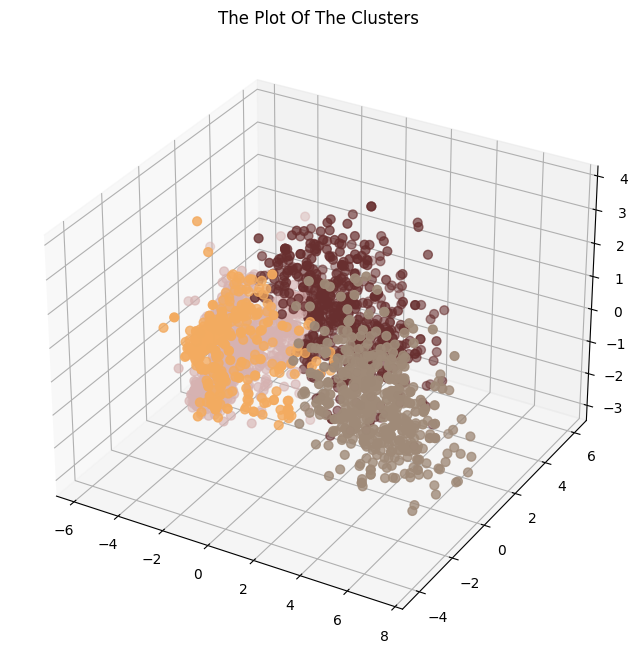

In [230]:
import matplotlib.pyplot as plt
from matplotlib import colors

#visually separate out the clusters!

x, y, z = segmentor.reduced_features[:,0], segmentor.reduced_features[:,1], segmentor.reduced_features[:,2]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=agg_df["agg_clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

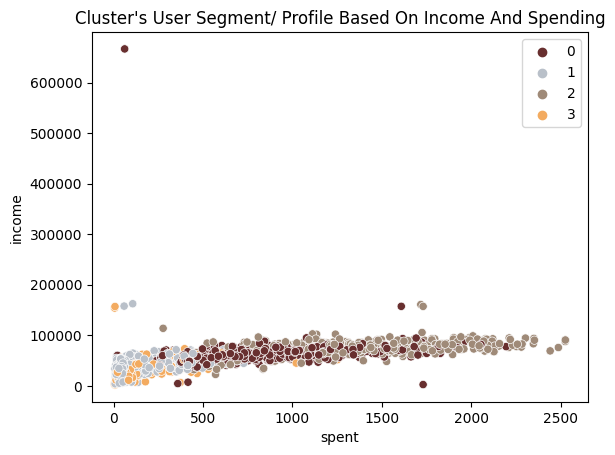

In [233]:
#show spending patterns -- since it is 'Value-based' segment
import seaborn as sns

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

#build a map of what attributes to track for each of the segments
#{"Value-based" : {"x" : "spent", "y" : "income"}, "Demographic" : {"x" : "age", "y" : "income"}, ... etc.}

pl = sns.scatterplot(data = df,
                     x=df["spent"],
                     y=df["income"],
                     hue=df["agg_clusters"],
                     palette= pal)

pl.set_title("Cluster's User Segment/ Profile Based On Income And Spending")

plt.legend()
plt.show()

In [237]:
#save outputs for pipeline runs

# df.to_excel("Outputs/auto_segmentation_results.xlsx",
#             index=False,
#             encoding="utf-8-sig")

In [ ]:
#query chatgpt with customer persona types for each cluster -- feed as input

# expected : 
# ["high_income | high_spending",
# "high_income | average_spending",
# "low_income | low_spending",
# "low_income | high_spending"]